# Part 1: Real-Time Data Collection & Preprocessing

<ipython-input-1-c835e12d0730>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-c835e12d0730>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


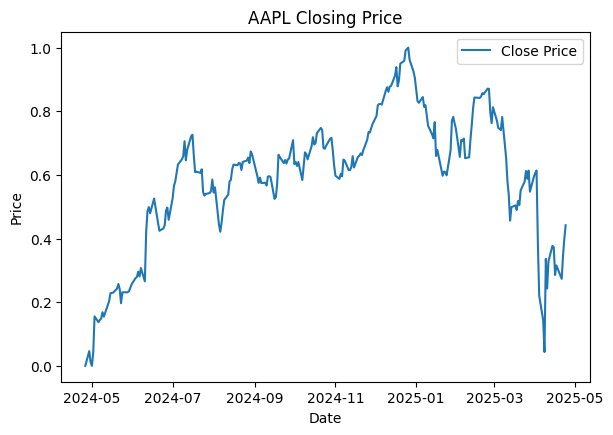

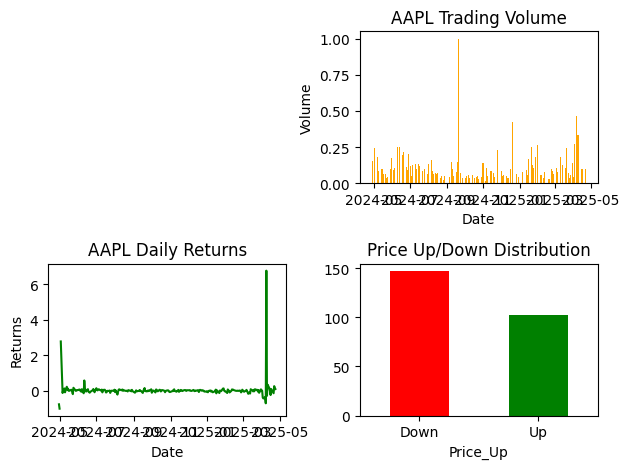

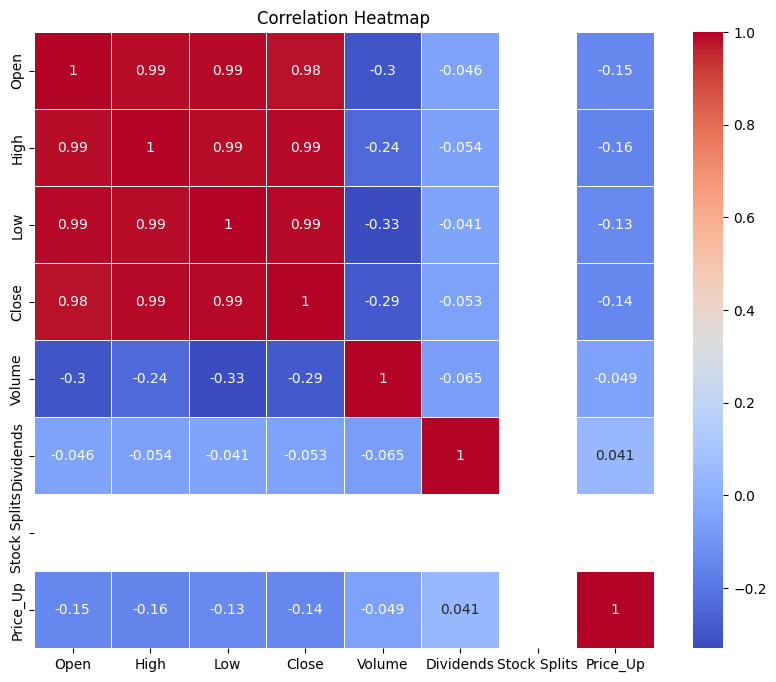

In [1]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Fetch stock data
def fetch_stock_data(ticker, period='1y'):
    stock = yf.Ticker(ticker)
    df = stock.history(period=period)
    return df

# Preprocess data
def preprocess_data(df):
    # Handle missing values
    df.fillna(method='ffill', inplace=True)

    # Create target variable for classification (1 if price increased, 0 otherwise)
    df['Price_Up'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

    # Drop the last row as we don't know the next day's movement
    df = df[:-1]

    # Normalize the data
    scaler = MinMaxScaler()
    numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df, scaler

# Visualization
def visualize_data(df, ticker):
    plt.figure(figsize=(15, 10))

    # Price trends
    plt.subplot(2, 2, 1)
    plt.plot(df['Close'], label='Close Price')
    plt.title(f'{ticker} Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Volume analysis
    plt.subplot(2, 2, 2)
    plt.bar(df.index, df['Volume'], color='orange')
    plt.title(f'{ticker} Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')

    # Daily price changes
    plt.subplot(2, 2, 3)
    daily_returns = df['Close'].pct_change()
    plt.plot(daily_returns, label='Daily Returns', color='green')
    plt.title(f'{ticker} Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')

    # Price Up/Down distribution
    plt.subplot(2, 2, 4)
    df['Price_Up'].value_counts().plot(kind='bar', color=['red', 'green'])
    plt.title('Price Up/Down Distribution')
    plt.xticks([0, 1], ['Down', 'Up'], rotation=0)

    plt.tight_layout()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage
ticker = 'AAPL'  # Apple stock
df = fetch_stock_data(ticker)
df, scaler = preprocess_data(df)
visualize_data(df, ticker)

# Part 2: Stock Classification - Predicting Price Movement

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.5961 - loss: 0.6681 - val_accuracy: 0.7368 - val_loss: 0.6618
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6048 - loss: 0.6686 - val_accuracy: 0.4211 - val_loss: 0.6880
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5030 - loss: 0.7125 - val_accuracy: 0.7368 - val_loss: 0.6690
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5638 - loss: 0.6840 - val_accuracy: 0.7368 - val_loss: 0.6516
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5956 - loss: 0.6789 - val_accuracy: 0.7368 - val_loss: 0.6559
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6284 - loss: 0.6704 - val_accuracy: 0.7368 - val_loss: 0.6652
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5768 - loss: 0.6738 - val_accuracy: 0.7895 - val_loss: 0.6750
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5577 - loss: 0.6821 - val_accu

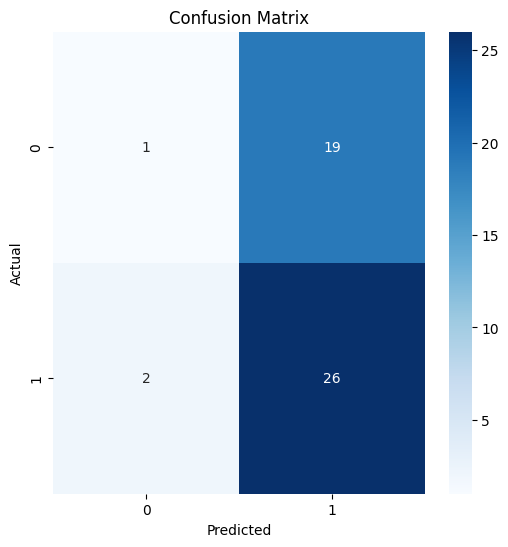

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        20
           1       0.58      0.93      0.71        28

    accuracy                           0.56        48
   macro avg       0.46      0.49      0.40        48
weighted avg       0.48      0.56      0.45        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


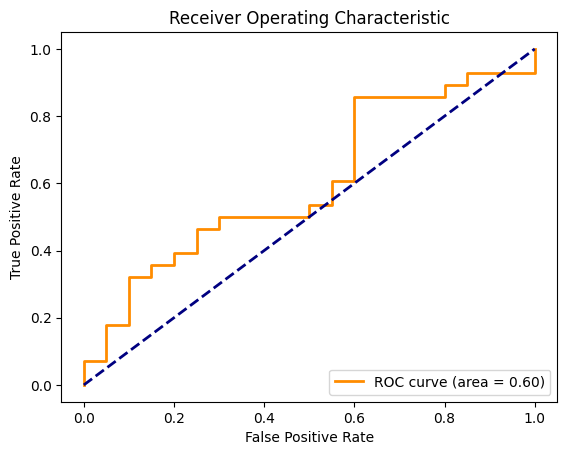


Training SimpleRNN model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.4499 - loss: 0.7528 - val_accuracy: 0.7368 - val_loss: 0.6275
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5997 - loss: 0.6744 - val_accuracy: 0.4737 - val_loss: 0.6961
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5460 - loss: 0.6821 - val_accuracy: 0.7368 - val_loss: 0.6167
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5640 - loss: 0.6709 - val_accuracy: 0.7368 - val_loss: 0.6048
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5695 - loss: 0.6591 - val_accuracy: 0.7368 - val_loss: 0.6445
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5796 - loss: 0.6708 - val_accuracy: 0.7368 - val_loss: 0.6004
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5232 - loss: 0.6690 - val_accuracy: 0.4737 - val_loss: 0.6777
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5346 - loss: 0.6773 - va

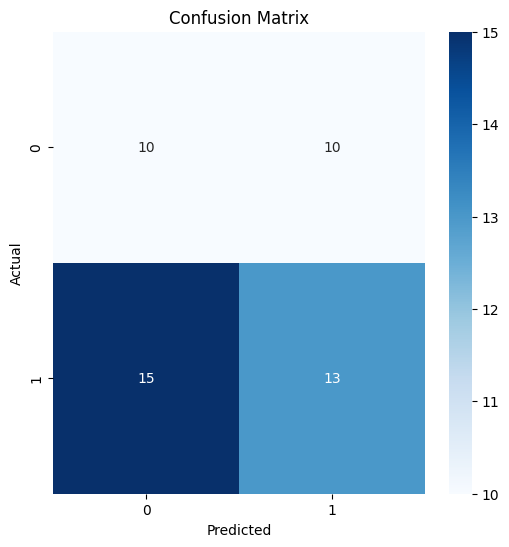

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        20
           1       0.57      0.46      0.51        28

    accuracy                           0.48        48
   macro avg       0.48      0.48      0.48        48
weighted avg       0.50      0.48      0.48        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


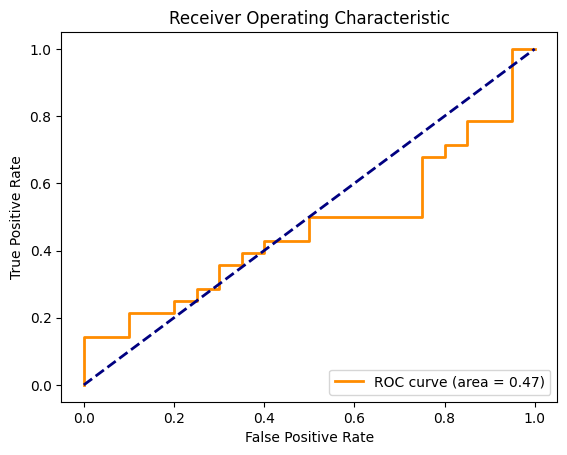


Training LSTM model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.5886 - loss: 0.6874 - val_accuracy: 0.7368 - val_loss: 0.6533
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5666 - loss: 0.6899 - val_accuracy: 0.7368 - val_loss: 0.6732
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5964 - loss: 0.6847 - val_accuracy: 0.7368 - val_loss: 0.6609
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5771 - loss: 0.6857 - val_accuracy: 0.7368 - val_loss: 0.6617
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5829 - loss: 0.6839 - val_accuracy: 0.7368 - val_loss: 0.6544
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5486 - loss: 0.6905 - val_accuracy: 0.7368 - val_loss: 0.6516
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5864 - loss: 0.6813 - val_accuracy: 0.7368 - val_loss: 0.6378
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5548 - loss: 0.6888 - val_acc

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step


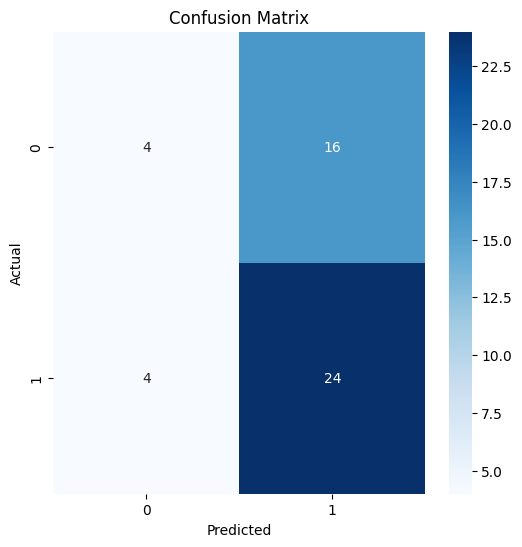

              precision    recall  f1-score   support

           0       0.50      0.20      0.29        20
           1       0.60      0.86      0.71        28

    accuracy                           0.58        48
   macro avg       0.55      0.53      0.50        48
weighted avg       0.56      0.58      0.53        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


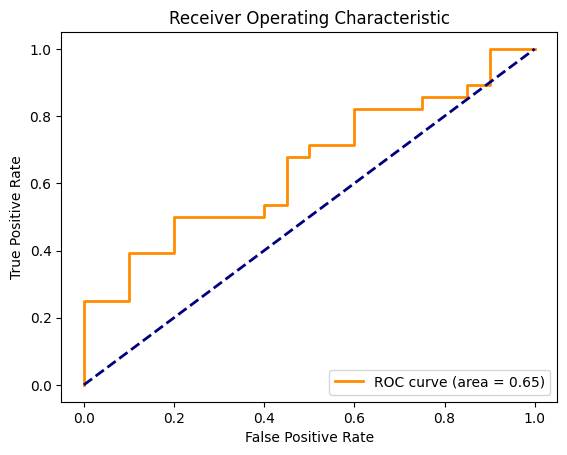

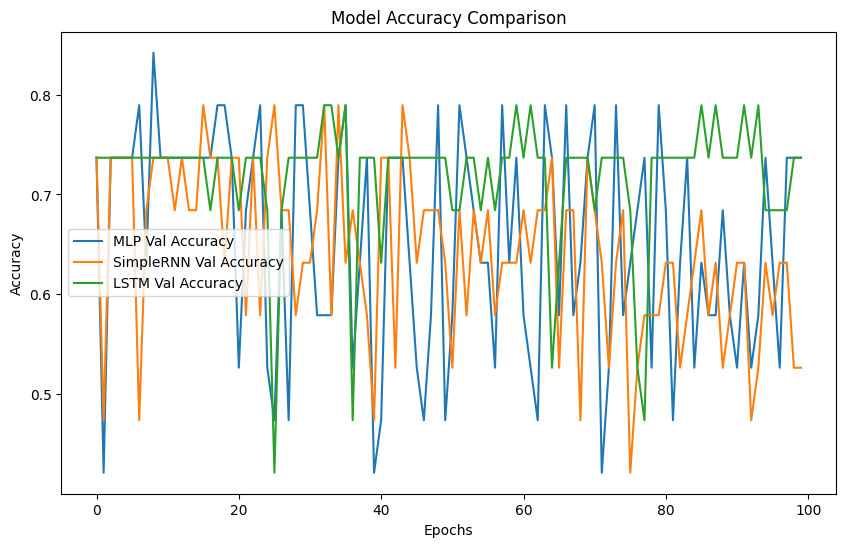

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for classification
def prepare_classification_data(df, look_back=10):
    X, y = [], []
    for i in range(len(df) - look_back - 1):
        features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values[i:i+look_back]
        target = df['Price_Up'].values[i+look_back]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Create MLP model
def create_mlp(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create SimpleRNN model
def create_simplernn(input_shape):
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        SimpleRNN(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create LSTM model
def create_lstm(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = (model.predict(X_test) > 0.5).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    print(classification_report(y_test, y_pred))

    # ROC curve
    y_pred_prob = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return y_pred

# Main classification workflow
def run_classification(df):
    look_back = 10
    X, y = prepare_classification_data(df, look_back)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for MLP
    X_train_mlp = X_train.reshape(X_train.shape[0], -1)
    X_test_mlp = X_test.reshape(X_test.shape[0], -1)
    input_shape_mlp = (X_train_mlp.shape[1],)


    # Models
    models = {
        'MLP': create_mlp(input_shape_mlp),
        'SimpleRNN': create_simplernn((look_back, 5)),
        'LSTM': create_lstm((look_back, 5))
    }

    results = {}
    for name, model in models.items():
        print(f"\nTraining {name} model...")
        if name == 'MLP':
            history = model.fit(X_train_mlp, y_train, epochs=100, batch_size=32,
                              validation_split=0.1, verbose=1)
            y_pred = evaluate_model(model, X_test_mlp, y_test)
        else:
            history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                              validation_split=0.1, verbose=1)
            y_pred = evaluate_model(model, X_test, y_test)

        results[name] = {
            'history': history,
            'y_pred': y_pred
        }

    # Compare model accuracies
    plt.figure(figsize=(10, 6))
    for name, result in results.items():
        plt.plot(result['history'].history['val_accuracy'], label=f'{name} Val Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


    return results


# Run classification
classification_results = run_classification(df)

# Part 3: Stock Price Prediction - Next Day Price

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.8525 - val_loss: 0.0395
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1097 - val_loss: 0.0697
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0795 - val_loss: 0.0945
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0889 - val_loss: 0.0205
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - val_loss: 0.0050
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0358 - val_loss: 0.0059
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0308 - val_loss: 0.0049
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - val_loss: 0.0069
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0294 - val_loss: 0.0085
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - val_loss: 0.0061
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0230 - val_loss: 0.0043
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 

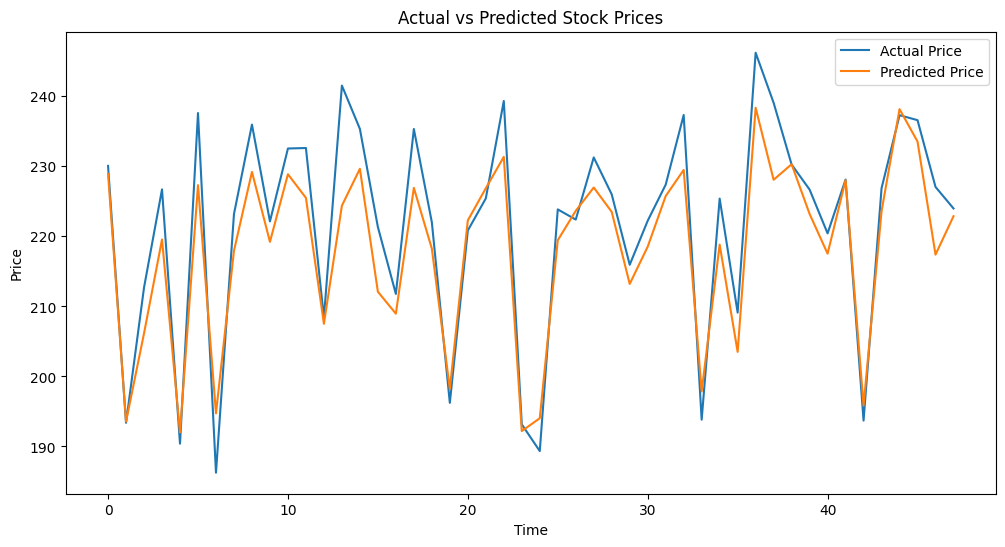


Training SimpleRNN model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.4910 - val_loss: 0.1703
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0930 - val_loss: 0.0917
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0902 - val_loss: 0.0345
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0393 - val_loss: 0.0309
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - val_loss: 0.0167
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0197 - val_loss: 0.0131
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0124 - val_loss: 0.0066
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0099 - val_loss: 0.0047
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0093 - val_loss: 0.0078
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0097 - val_loss: 0.0042
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24m

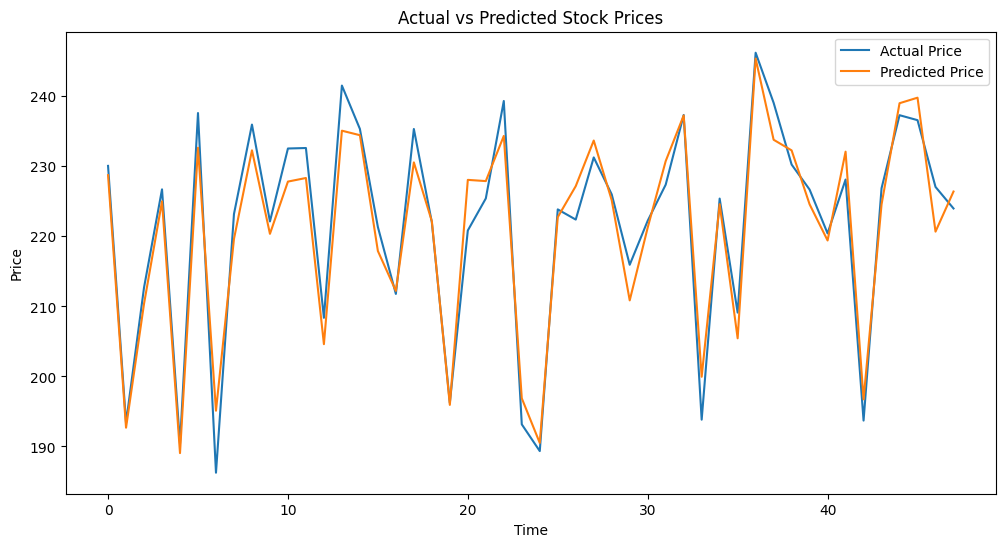


Training LSTM model...
Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.2117 - val_loss: 0.0092
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0276 - val_loss: 0.0229
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0153 - val_loss: 0.0099
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0211 - val_loss: 0.0090
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0131 - val_loss: 0.0068
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0114 - val_loss: 0.0099
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0131 - val_loss: 0.0053
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0086 - val_loss: 0.0055
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0103 - val_loss: 0.0057
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0095 - val_loss: 0.0067
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/ste

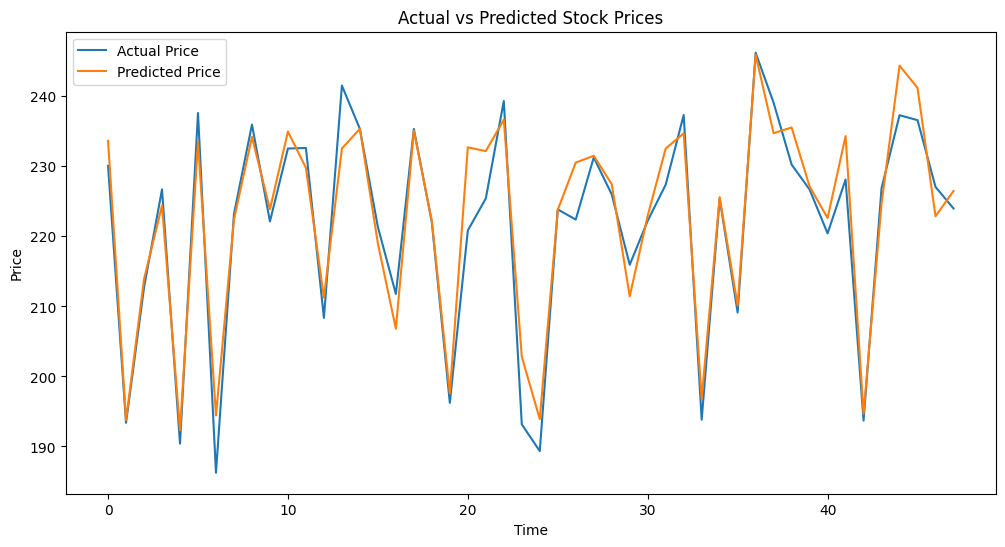

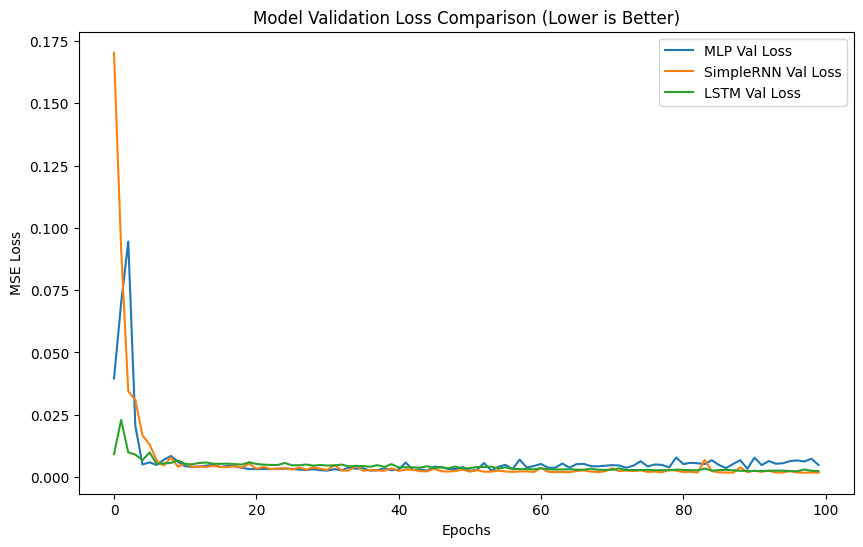

In [3]:
from sklearn.metrics import mean_squared_error

# Prepare data for regression
def prepare_regression_data(df, look_back=10):
    X, y = [], []
    for i in range(len(df) - look_back - 1):
        features = df[['Open', 'High', 'Low', 'Close', 'Volume']].values[i:i+look_back]
        target = df['Close'].values[i+look_back]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Create MLP regression model
def create_mlp_regression(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create SimpleRNN regression model
def create_simplernn_regression(input_shape):
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=input_shape),
        SimpleRNN(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create LSTM regression model
def create_lstm_regression(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Evaluate regression model
def evaluate_regression_model(model, X_test, y_test, scaler):
    y_pred = model.predict(X_test)

    # Inverse transform if data was normalized
    if scaler:
        # Create dummy array with 5 columns to match scaler's expectations
        dummy_test = np.zeros((len(y_test), 5))
        dummy_test[:, 3] = y_test  # Close price is the 4th column (index 3)
        dummy_test = scaler.inverse_transform(dummy_test)
        y_test = dummy_test[:, 3]

        dummy_pred = np.zeros((len(y_pred), 5))
        dummy_pred[:, 3] = y_pred.reshape(-1)
        dummy_pred = scaler.inverse_transform(dummy_pred)
        y_pred = dummy_pred[:, 3]

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual Price')
    plt.plot(y_pred, label='Predicted Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return y_pred, mse, rmse

# Main regression workflow
def run_regression(df, scaler):
    look_back = 10
    X, y = prepare_regression_data(df, look_back)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for MLP
    X_train_mlp = X_train.reshape(X_train.shape[0], -1)
    X_test_mlp = X_test.reshape(X_test.shape[0], -1)
    input_shape_mlp = (X_train_mlp.shape[1],)

    # Models
    models = {
        'MLP': create_mlp_regression(input_shape_mlp),
        'SimpleRNN': create_simplernn_regression((look_back, 5)),
        'LSTM': create_lstm_regression((look_back, 5))
    }

    results = {}
    for name, model in models.items():
        print(f"\nTraining {name} model...")
        if name == 'MLP':
            history = model.fit(X_train_mlp, y_train, epochs=100, batch_size=32,
                              validation_split=0.1, verbose=1)
            y_pred, mse, rmse = evaluate_regression_model(model, X_test_mlp, y_test, scaler)
        else:
            history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                              validation_split=0.1, verbose=1)
            y_pred, mse, rmse = evaluate_regression_model(model, X_test, y_test, scaler)

        results[name] = {
            'history': history,
            'y_pred': y_pred,
            'mse': mse,
            'rmse': rmse
        }

    # Compare model performance
    plt.figure(figsize=(10, 6))
    for name, result in results.items():
        plt.plot(result['history'].history['val_loss'], label=f'{name} Val Loss')
    plt.title('Model Validation Loss Comparison (Lower is Better)')
    plt.xlabel('Epochs')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

    return results

# Run regression
regression_results = run_regression(df, scaler)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP model...
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.4379 - loss: 0.7287 - val_accuracy: 0.7368 - val_loss: 0.6416
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6090 - loss: 0.6793 - val_accuracy: 0.7368 - val_loss: 0.6323
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5961 - loss: 0.6853 - val_accuracy: 0.7368 - val_loss: 0.6690
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5222 - loss: 0.6853 - val_accuracy: 0.3684 - val_loss: 0.7060
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6354 - loss: 0.6795 - val_accuracy: 0.7368 - val_loss: 0.6710
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6345 - loss: 0.6797 - val_accuracy: 0.7368 - val_loss: 0.6554
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6159 - loss: 0.6658 - val_accuracy: 0.7368 - val_loss: 0.6628
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5829 - loss: 0.6766 - val_accuracy: 0.7

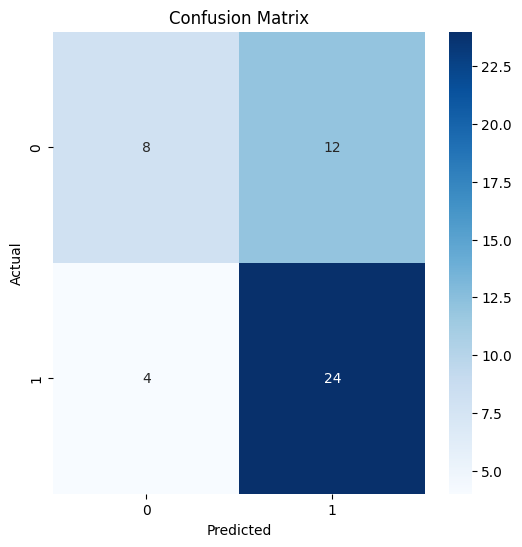

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.67      0.86      0.75        28

    accuracy                           0.67        48
   macro avg       0.67      0.63      0.62        48
weighted avg       0.67      0.67      0.65        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


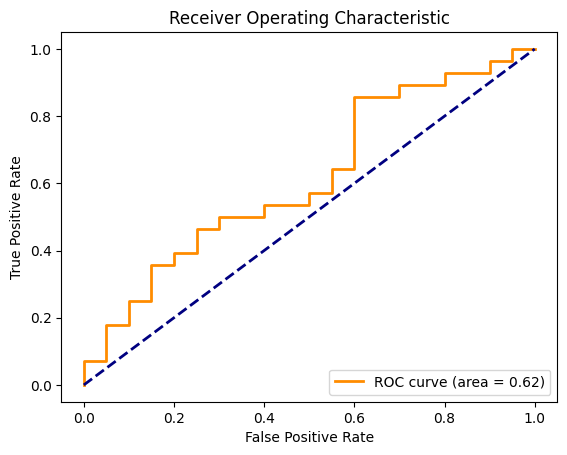


Training SimpleRNN model...
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.4813 - loss: 0.7663 - val_accuracy: 0.7368 - val_loss: 0.5873
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5466 - loss: 0.6916 - val_accuracy: 0.7368 - val_loss: 0.6529
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5876 - loss: 0.6756 - val_accuracy: 0.7368 - val_loss: 0.5998
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6002 - loss: 0.6602 - val_accuracy: 0.7368 - val_loss: 0.6213
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5927 - loss: 0.6605 - val_accuracy: 0.5789 - val_loss: 0.6644
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5537 - loss: 0.6746 - val_accuracy: 0.7368 - val_loss: 0.6109
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5498 - loss: 0.6670 - val_accuracy: 0.7368 - val_loss: 0.5829
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5526 - loss: 0.6740 - val_accura

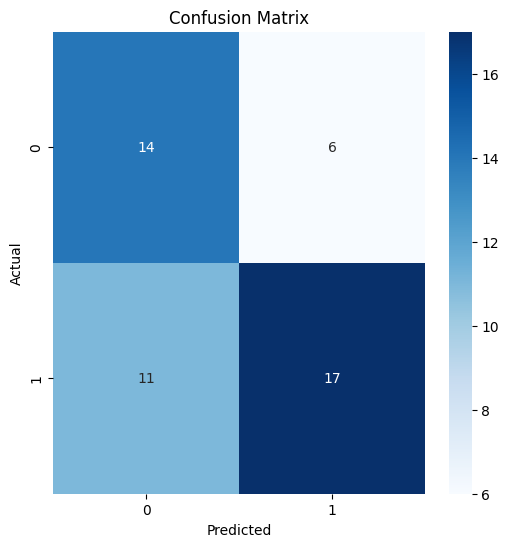

              precision    recall  f1-score   support

           0       0.56      0.70      0.62        20
           1       0.74      0.61      0.67        28

    accuracy                           0.65        48
   macro avg       0.65      0.65      0.64        48
weighted avg       0.66      0.65      0.65        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


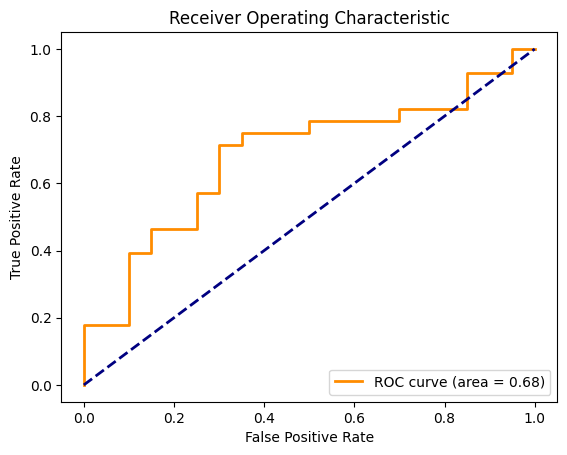


Training LSTM model...
Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.4769 - loss: 0.6934 - val_accuracy: 0.7368 - val_loss: 0.6522
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5631 - loss: 0.6874 - val_accuracy: 0.7368 - val_loss: 0.6547
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5863 - loss: 0.6829 - val_accuracy: 0.7368 - val_loss: 0.6425
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5619 - loss: 0.6894 - val_accuracy: 0.7368 - val_loss: 0.6461
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5704 - loss: 0.6834 - val_accuracy: 0.7368 - val_loss: 0.6497
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5396 - loss: 0.6900 - val_accuracy: 0.7368 - val_loss: 0.6565
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5983 - loss: 0.6790 - val_accuracy: 0.7368 - val_loss: 0.6532
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6160 - loss: 0.6704 - val_accuracy: 0

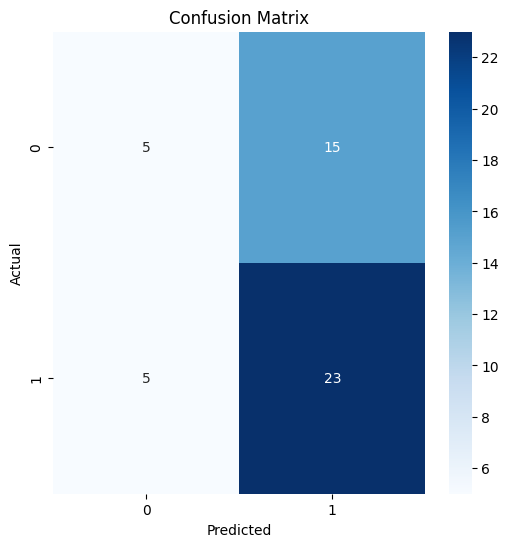

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        20
           1       0.61      0.82      0.70        28

    accuracy                           0.58        48
   macro avg       0.55      0.54      0.52        48
weighted avg       0.56      0.58      0.55        48

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


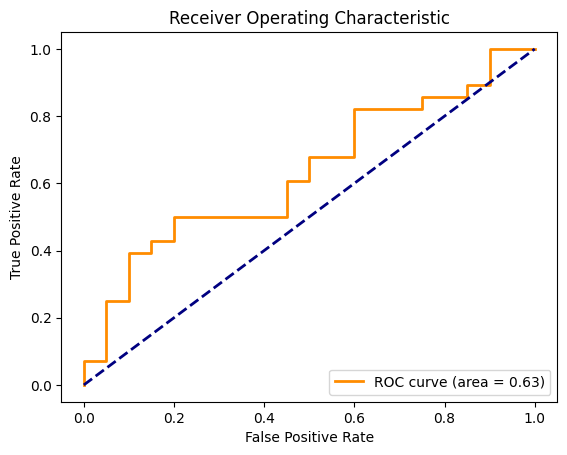

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.9898 - val_loss: 0.2254
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2291 - val_loss: 0.0099
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0493 - val_loss: 0.0736
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0695 - val_loss: 0.0368
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0408 - val_loss: 0.0085
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0228 - val_loss: 0.0117
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - val_loss: 0.0109
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0308 - val_loss: 0.0076
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0280 - val_loss: 0.0086
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0248 - val_loss: 0.0077
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0224 - val_loss: 0.0073
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.02

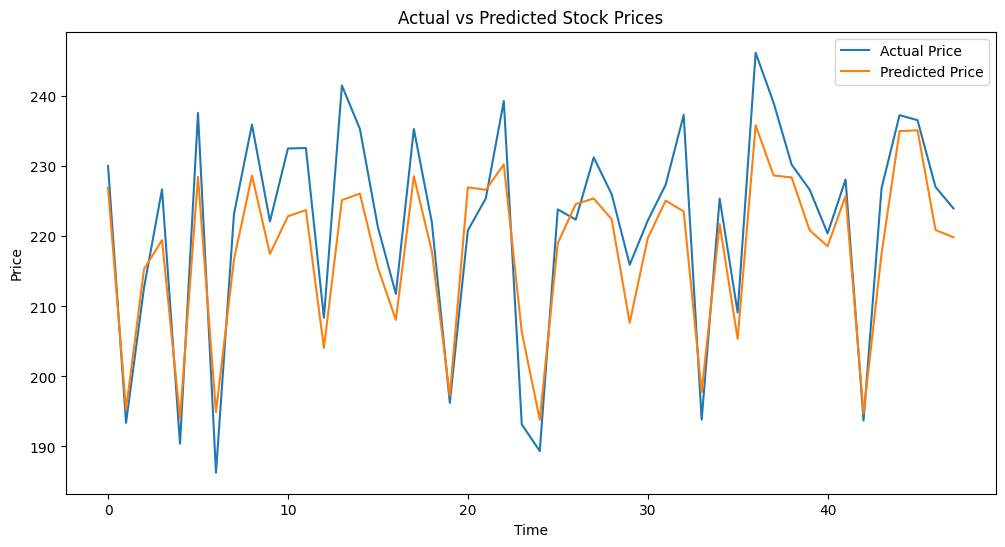


Training SimpleRNN model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - loss: 0.3194 - val_loss: 0.0216
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0478 - val_loss: 0.0130
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0324 - val_loss: 0.0298
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0228 - val_loss: 0.0169
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0207 - val_loss: 0.0093
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0155 - val_loss: 0.0067
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0118 - val_loss: 0.0053
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0079 - val_loss: 0.0077
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0080 - val_loss: 0.0043
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - los

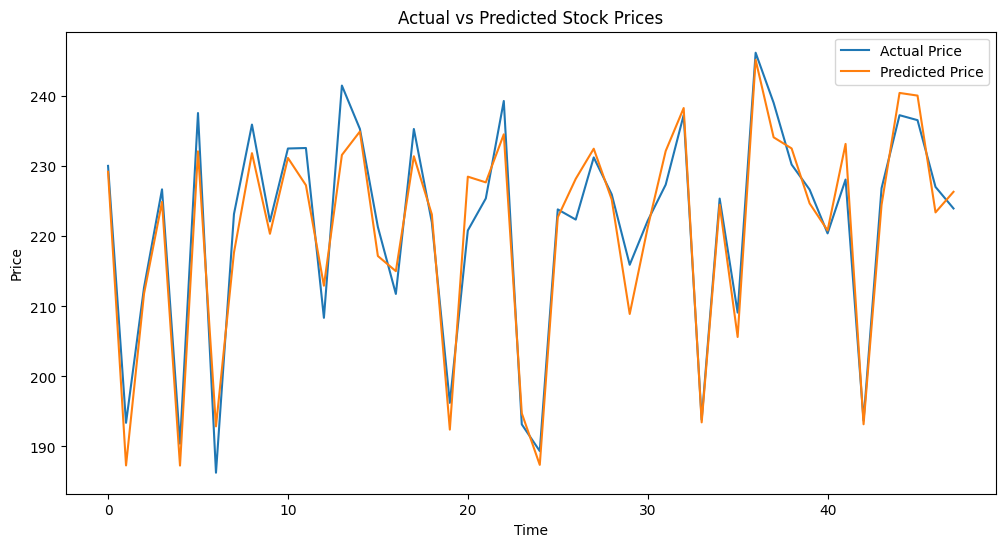


Training LSTM model...
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.1901 - val_loss: 0.0174
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0321 - val_loss: 0.0216
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0172 - val_loss: 0.0101
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0191 - val_loss: 0.0080
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0125 - val_loss: 0.0079
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0141 - val_loss: 0.0056
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0104 - val_loss: 0.0055
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0130 - val_loss: 0.0061
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0100 - val_loss: 0.0064
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0096 - val_loss: 0.0055
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.

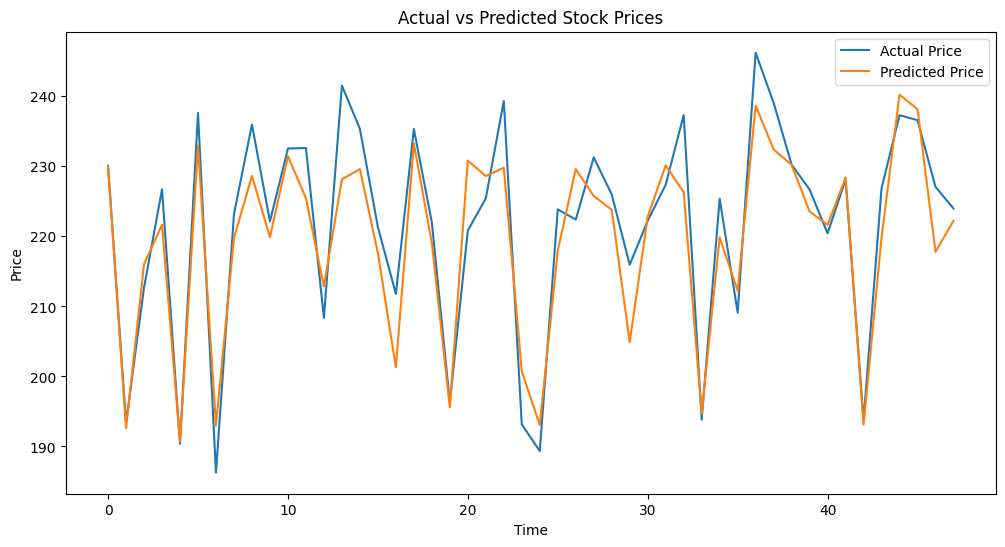

All models and scaler saved successfully!


In [4]:
def run_classification(df):
    look_back = 10
    X, y = prepare_classification_data(df, look_back)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for MLP
    X_train_mlp = X_train.reshape(X_train.shape[0], -1)
    X_test_mlp = X_test.reshape(X_test.shape[0], -1)
    input_shape_mlp = (X_train_mlp.shape[1],)

    # Models
    models = {
        'MLP': create_mlp(input_shape_mlp),
        'SimpleRNN': create_simplernn((look_back, 5)),
        'LSTM': create_lstm((look_back, 5))
    }

    results = {}
    for name, model in models.items():
        print(f"\nTraining {name} model...")
        if name == 'MLP':
            history = model.fit(X_train_mlp, y_train, epochs=20, batch_size=32,
                             validation_split=0.1, verbose=1)
            y_pred = evaluate_model(model, X_test_mlp, y_test)
        else:
            history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                             validation_split=0.1, verbose=1)
            y_pred = evaluate_model(model, X_test, y_test)

        # Store both the model and history in results
        results[name] = {
            'model': model,  # Store the actual model
            'history': history.history,  # Store training history
            'y_pred': y_pred
        }

    # ... rest of function ...
    return results

# Similarly modify run_regression():
def run_regression(df, scaler):
    look_back = 10
    X, y = prepare_regression_data(df, look_back)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Reshape for MLP
    X_train_mlp = X_train.reshape(X_train.shape[0], -1)
    X_test_mlp = X_test.reshape(X_test.shape[0], -1)
    input_shape_mlp = (X_train_mlp.shape[1],)

    # Models
    models = {
        'MLP': create_mlp_regression(input_shape_mlp),
        'SimpleRNN': create_simplernn_regression((look_back, 5)),
        'LSTM': create_lstm_regression((look_back, 5))
    }

    results = {}
    for name, model in models.items():
        print(f"\nTraining {name} model...")
        if name == 'MLP':
            history = model.fit(X_train_mlp, y_train, epochs=50, batch_size=32,
                             validation_split=0.1, verbose=1)
            y_pred, mse, rmse = evaluate_regression_model(model, X_test_mlp, y_test, scaler)
        else:
            history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                             validation_split=0.1, verbose=1)
            y_pred, mse, rmse = evaluate_regression_model(model, X_test, y_test, scaler)

        # Store both the model and history in results
        results[name] = {
            'model': model,  # Store the actual model
            'history': history.history,  # Store training history
            'y_pred': y_pred,
            'mse': mse,
            'rmse': rmse
        }


    return results


classification_results = run_classification(df)
regression_results = run_regression(df, scaler)

# save the models - this will now work correctly
import joblib
from tensorflow.keras.models import save_model

# Save classification models
for name, result in classification_results.items():
    save_model(result['model'], f'{name.lower()}_classification.h5')

# Save regression models
for name, result in regression_results.items():
    save_model(result['model'], f'{name.lower()}_regression.h5')

# Save scaler
joblib.dump(scaler, 'scaler.save')

print("All models and scaler saved successfully!")

In [5]:
# Save models and scaler
import joblib

# Classification models
for name, result in classification_results.items():
    if name == 'MLP':
        result['model'].save(f'{name.lower()}_classification.h5')
    else:
        result['model'].save(f'{name.lower()}_classification.h5')

# Regression models
for name, result in regression_results.items():
    if name == 'MLP':
        result['model'].save(f'{name.lower()}_regression.h5')
    else:
        result['model'].save(f'{name.lower()}_regression.h5')

# Save scaler
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [6]:
from google.colab import files
import zipfile
import os

# List of files to download
file_list = [
    'mlp_classification.h5',
    'simplernn_classification.h5',
    'lstm_classification.h5',
    'mlp_regression.h5',
    'simplernn_regression.h5',
    'lstm_regression.h5',
    'scaler.save'
]

# Create a zip file containing all files
zip_filename = 'stock_models.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in file_list:
        if os.path.exists(file):
            zipf.write(file)

# Download the zip file
files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>